In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
##1.	Load the dataset and display the first few rows. How many countries does the dataset have?

In [44]:
ns_utsav = pd.read_csv("https://drive.google.com/uc?id=1fDGZh86UPUkt2K6enlNQfB0mswU8pB_P")
ns_utsav.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [45]:
##2.	Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values
pivot_table = ns_utsav.pivot_table(values='life_exp', index='continent', columns='year', aggfunc='mean')
print(pivot_table)

year            1952       1957       1962       1967       1972       1977  \
continent                                                                     
Africa     39.135500  41.266346  43.319442  45.334538  47.450942  49.580423   
Americas   53.279840  55.960280  58.398760  60.410920  62.394920  64.391560   
Asia       46.314394  49.318544  51.563223  54.663640  57.319269  59.610556   
Europe     64.408500  66.703067  68.539233  69.737600  70.775033  71.937767   
Oceania    69.255000  70.295000  71.085000  71.310000  71.910000  72.855000   

year            1982       1987       1992       1997       2002       2007  
continent                                                                    
Africa     51.592865  53.344788  53.629577  53.598269  53.325231  54.806038  
Americas   66.228840  68.090720  69.568360  71.150480  72.422040  73.608120  
Asia       62.617939  64.851182  66.537212  68.020515  69.233879  70.728485  
Europe     72.806400  73.642167  74.440100  75.505167  7

In [16]:
##3.	Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [17]:
# Calculate the 75th percentile of GDP per capita in 2007
ns_utsav_2007 = ns_utsav[ns_utsav['year'] == 2007]
gdp_75th_percentile = ns_utsav_2007['gdp_cap'].quantile(0.75)
high_gdp_countries = ns_utsav_2007[ns_utsav_2007['gdp_cap'] > gdp_75th_percentile]
print(high_gdp_countries[['country', 'gdp_cap']])

               country      gdp_cap
71           Australia  34435.36744
83             Austria  36126.49270
95             Bahrain  29796.04834
119            Belgium  33692.60508
251             Canada  36319.23501
407     Czech Republic  22833.30851
419            Denmark  35278.41874
527            Finland  33207.08440
539             France  30470.01670
575            Germany  32170.37442
599             Greece  27538.41188
671   Hong Kong, China  39724.97867
683            Hungary  18008.94444
695            Iceland  36180.78919
755            Ireland  40675.99635
767             Israel  25523.27710
779              Italy  28569.71970
803              Japan  31656.06806
851        Korea, Rep.  23348.13973
863             Kuwait  47306.98978
1091       Netherlands  36797.93332
1103       New Zealand  25185.00911
1151            Norway  49357.19017
1163              Oman  22316.19287
1247          Portugal  20509.64777
1259       Puerto Rico  19328.70901
1319      Saudi Arabia  2165

In [18]:
##4.	Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

In [19]:
### Step 4: Categorize 'life_exp' into 4 equally ranged bins

bins = pd.cut(ns_utsav['life_exp'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
ns_utsav['Life_Exp_Range'] = bins
ns_utsav[['country', 'life_exp', 'Life_Exp_Range']].head()


,country,life_exp,Life_Exp_Range
0,Afghanistan,28.801,Low
1,Afghanistan,30.332,Low
2,Afghanistan,31.997,Low
3,Afghanistan,34.020,Low
4,Afghanistan,36.088,Low


In [20]:
##5.	Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

            country      gdp_cap
1151         Norway  49357.19017
863          Kuwait  47306.98978
1367      Singapore  47143.17964
1619  United States  42951.65309
755         Ireland  40675.99635


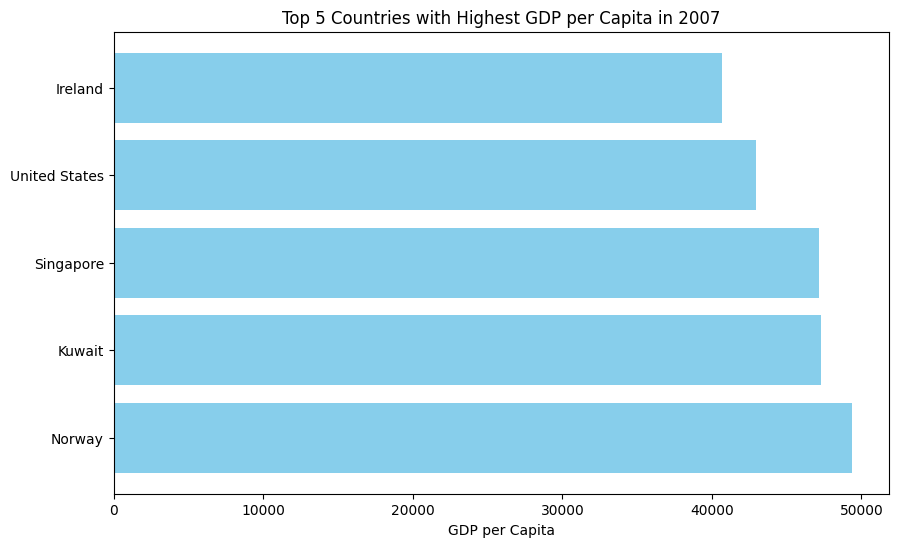

In [21]:
# 5. Top 5 countries with the highest GDP per capita in 2007
top_5_gdp_countries = ns_utsav_2007.nlargest(5, 'gdp_cap')
print(top_5_gdp_countries[['country', 'gdp_cap']])

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_gdp_countries['country'], top_5_gdp_countries['gdp_cap'], color='skyblue')
plt.xlabel('GDP per Capita')
plt.title('Top 5 Countries with Highest GDP per Capita in 2007')
plt.show()

In [22]:
##6.	Find all country names that start with "I" and end with "a" using regex.

In [23]:
# 6. Find all country names that start with "I" and end with "a" using regex
pattern = r'^I.*a$'
countries_i_a = ns_utsav[ns_utsav['country'].str.contains(pattern, regex=True)]
print(countries_i_a['country'].unique())


['India' 'Indonesia']


In [24]:
##7.	Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

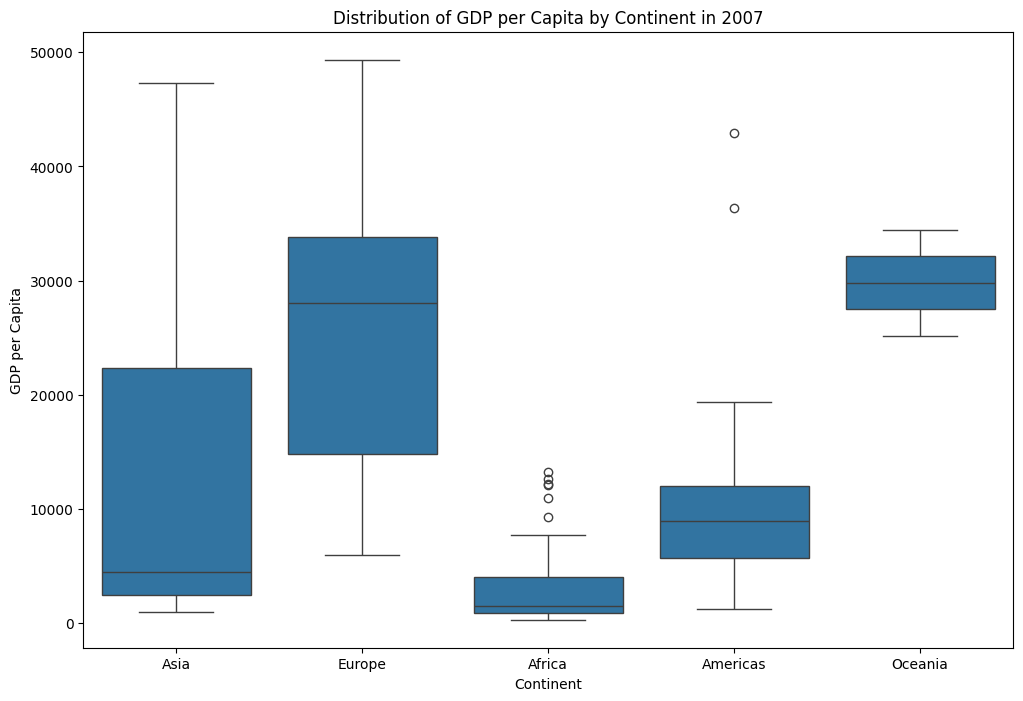

In [25]:
# 7. Boxplot to compare the distribution of GDP per capita for each continent in 2007
plt.figure(figsize=(12, 8))
sns.boxplot(x='continent', y='gdp_cap', data=ns_utsav_2007)
plt.xlabel('Continent')
plt.ylabel('GDP per Capita')
plt.title('Distribution of GDP per Capita by Continent in 2007')
plt.show()

In [26]:
##8.	Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.

In [27]:
# 8. Find all countries with a life expectancy of over 80 years in 2007
high_life_exp_countries = ns_utsav_2007[ns_utsav_2007['life_exp'] > 80]
print(high_life_exp_countries[['country', 'continent', 'life_exp']])

               country continent  life_exp
71           Australia   Oceania    81.235
251             Canada  Americas    80.653
539             France    Europe    80.657
671   Hong Kong, China      Asia    82.208
695            Iceland    Europe    81.757
767             Israel      Asia    80.745
779              Italy    Europe    80.546
803              Japan      Asia    82.603
1103       New Zealand   Oceania    80.204
1151            Norway    Europe    80.196
1427             Spain    Europe    80.941
1475            Sweden    Europe    80.884
1487       Switzerland    Europe    81.701


In [28]:
##9.	Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).

In [29]:
# 9. Convert the 'year' column to datetime and extract the decade
ns_utsav['year'] = pd.to_datetime(ns_utsav['year'], format='%Y')
ns_utsav['Decade'] = ns_utsav['year'].dt.year // 10 * 10
ns_utsav[['Decade', 'country']]

,Decade,country
0,1950,Afghanistan
1,1950,Afghanistan
2,1960,Afghanistan
3,1960,Afghanistan
4,1970,Afghanistan
...,...,...
1699,1980,Zimbabwe
1700,1990,Zimbabwe
1701,1990,Zimbabwe
1702,2000,Zimbabwe


In [30]:
##10.	Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.

             gdp_cap  life_exp  population
gdp_cap     1.000000  0.583706   -0.025600
life_exp    0.583706  1.000000    0.064955
population -0.025600  0.064955    1.000000


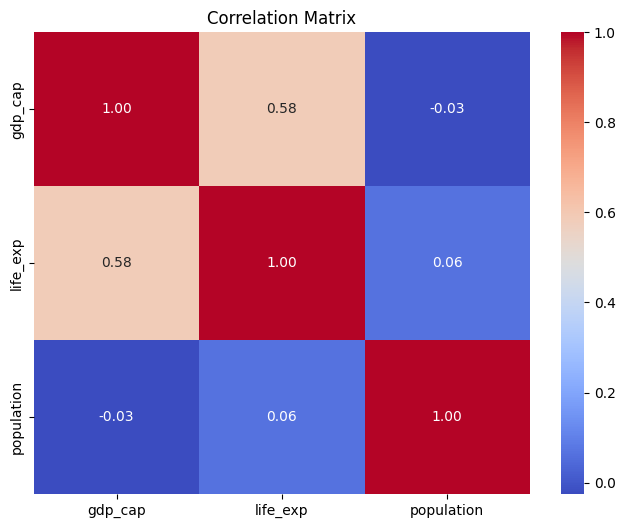

In [31]:
# 10. Compute and visualize the correlation matrix
corr_matrix = ns_utsav[['gdp_cap', 'life_exp', 'population']].corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [32]:
##11.	How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.

year
1952-01-01    49.057620
1957-01-01    51.507401
1962-01-01    53.609249
1967-01-01    55.678290
1972-01-01    57.647386
1977-01-01    59.570157
1982-01-01    61.533197
1987-01-01    63.212613
1992-01-01    64.160338
1997-01-01    65.014676
2002-01-01    65.694923
2007-01-01    67.007423
Name: life_exp, dtype: float64


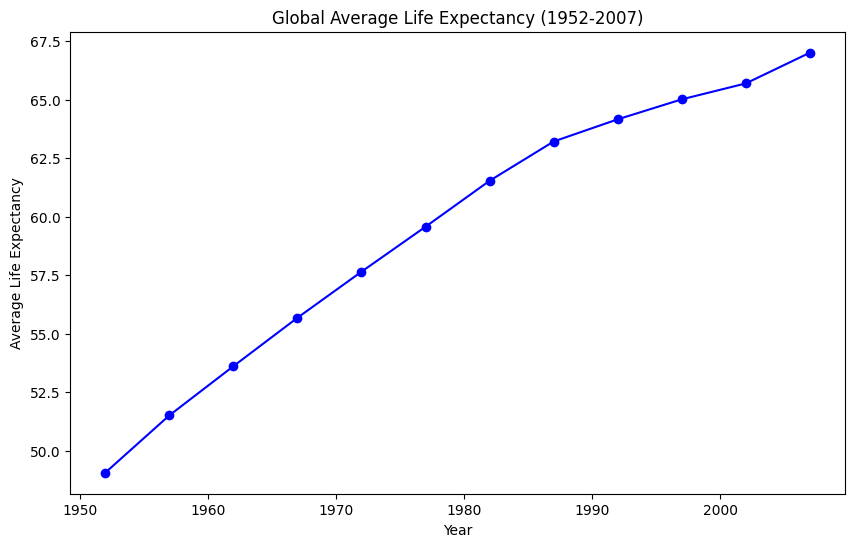

In [33]:
# 11. Global average life expectancy change from 1952 to 2007
global_life_exp = ns_utsav.groupby('year')['life_exp'].mean()
print(global_life_exp)

plt.figure(figsize=(10, 6))
plt.plot(global_life_exp.index, global_life_exp.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Global Average Life Expectancy (1952-2007)')
plt.show()

In [34]:
##12.	For the year 2007, analyze the relationship between life expectancy and GDP per capita. Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.

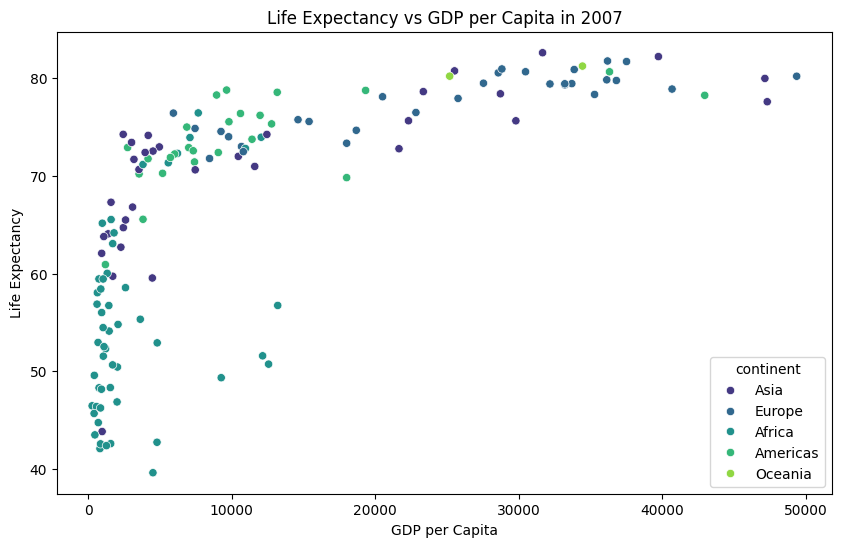

In [35]:
# 12. Relationship between life expectancy and GDP per capita in 2007
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_cap', y='life_exp', data=ns_utsav_2007, hue='continent', palette='viridis')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs GDP per Capita in 2007')
plt.show()

In [36]:
##13.	Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.

  continent       gdp_cap
0    Africa   3089.032605
1  Americas  11003.031625
2      Asia  12473.026870
3    Europe  25054.481636
4   Oceania  29810.188275


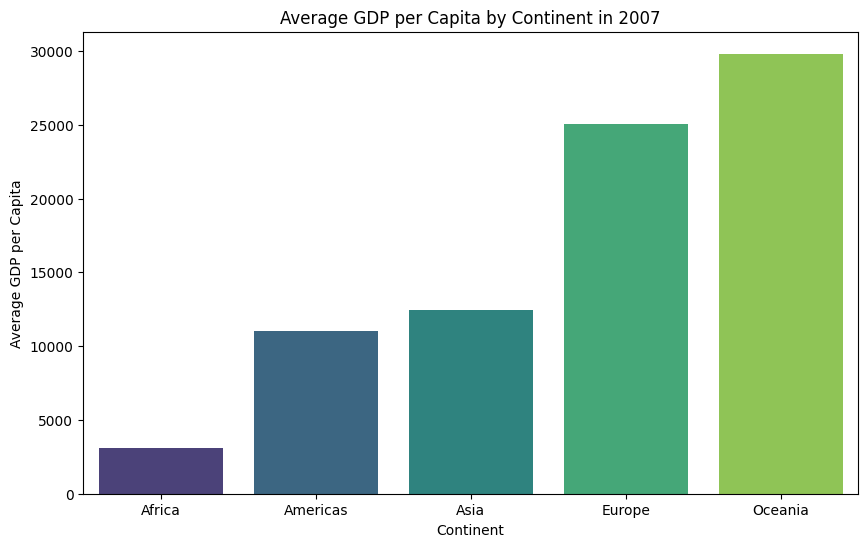

In [37]:
# 13. Average GDP per capita for each continent in 2007
avg_gdp_continent = ns_utsav_2007.groupby('continent')['gdp_cap'].mean().reset_index()
print(avg_gdp_continent)

plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='gdp_cap', data=avg_gdp_continent, hue='continent', palette='viridis', dodge=False)
plt.xlabel('Continent')
plt.ylabel('Average GDP per Capita')
plt.title('Average GDP per Capita by Continent in 2007')
plt.show()

In [38]:
##14.	Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.
##-	Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.
##-	Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.


          country       gdp_cap  life_exp
11    Afghanistan    974.580338    43.828
1487  Switzerland  37506.419070    81.701


<Figure size 1000x600 with 0 Axes>

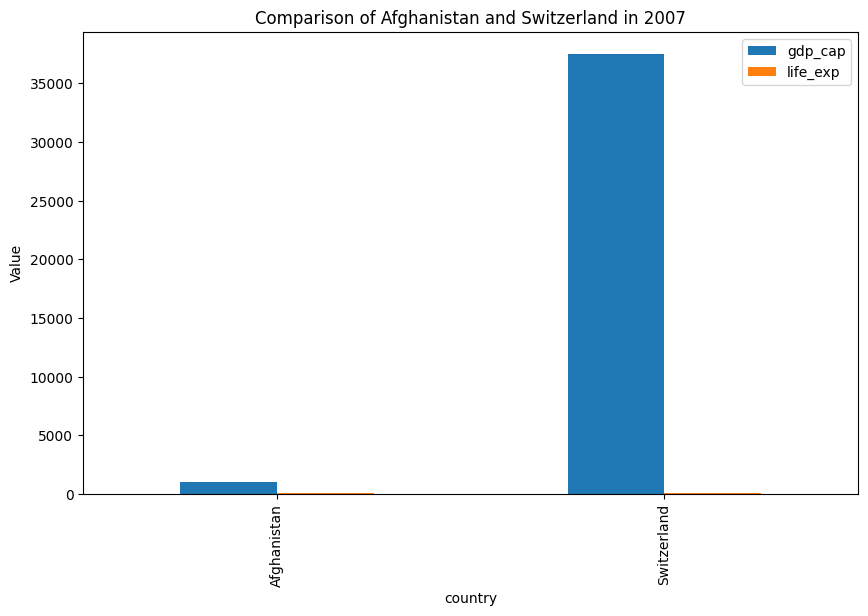

           year      country       gdp_cap  life_exp
0    1952-01-01  Afghanistan    779.445314    28.801
1    1957-01-01  Afghanistan    820.853030    30.332
2    1962-01-01  Afghanistan    853.100710    31.997
3    1967-01-01  Afghanistan    836.197138    34.020
4    1972-01-01  Afghanistan    739.981106    36.088
5    1977-01-01  Afghanistan    786.113360    38.438
6    1982-01-01  Afghanistan    978.011439    39.854
7    1987-01-01  Afghanistan    852.395945    40.822
8    1992-01-01  Afghanistan    649.341395    41.674
9    1997-01-01  Afghanistan    635.341351    41.763
10   2002-01-01  Afghanistan    726.734055    42.129
11   2007-01-01  Afghanistan    974.580338    43.828
1476 1952-01-01  Switzerland  14734.232750    69.620
1477 1957-01-01  Switzerland  17909.489730    70.560
1478 1962-01-01  Switzerland  20431.092700    71.320
1479 1967-01-01  Switzerland  22966.144320    72.770
1480 1972-01-01  Switzerland  27195.113040    73.780
1481 1977-01-01  Switzerland  26982.290520    

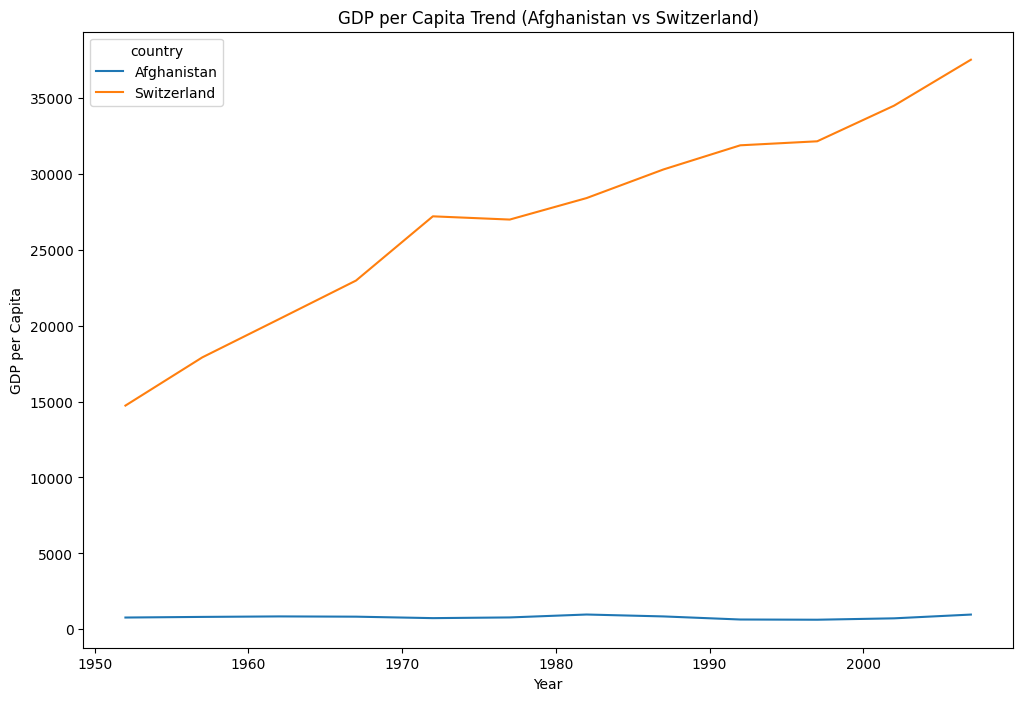

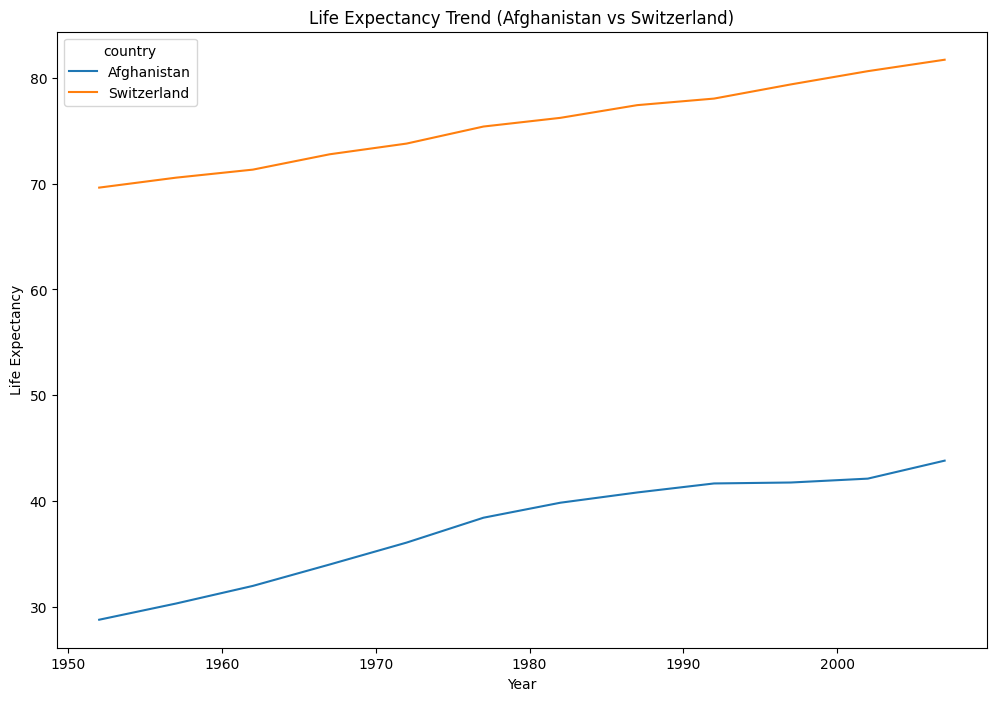

In [39]:
# 14. Compare Afghanistan and Switzerland in 2007
afg_swi_2007 = ns_utsav_2007[ns_utsav_2007['country'].isin(['Afghanistan', 'Switzerland'])]
print(afg_swi_2007[['country', 'gdp_cap', 'life_exp']])

# Bar chart for 2007 comparison
plt.figure(figsize=(10, 6))
afg_swi_2007.plot(kind='bar', x='country', y=['gdp_cap', 'life_exp'], figsize=(10, 6))
plt.title('Comparison of Afghanistan and Switzerland in 2007')
plt.ylabel('Value')
plt.show()

# Trends over all available years
afg_swi_trends = ns_utsav[ns_utsav['country'].isin(['Afghanistan', 'Switzerland'])]
print(afg_swi_trends[['year', 'country', 'gdp_cap', 'life_exp']])

plt.figure(figsize=(12, 8))
sns.lineplot(data=afg_swi_trends, x='year', y='gdp_cap', hue='country')
plt.title('GDP per Capita Trend (Afghanistan vs Switzerland)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=afg_swi_trends, x='year', y='life_exp', hue='country')
plt.title('Life Expectancy Trend (Afghanistan vs Switzerland)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

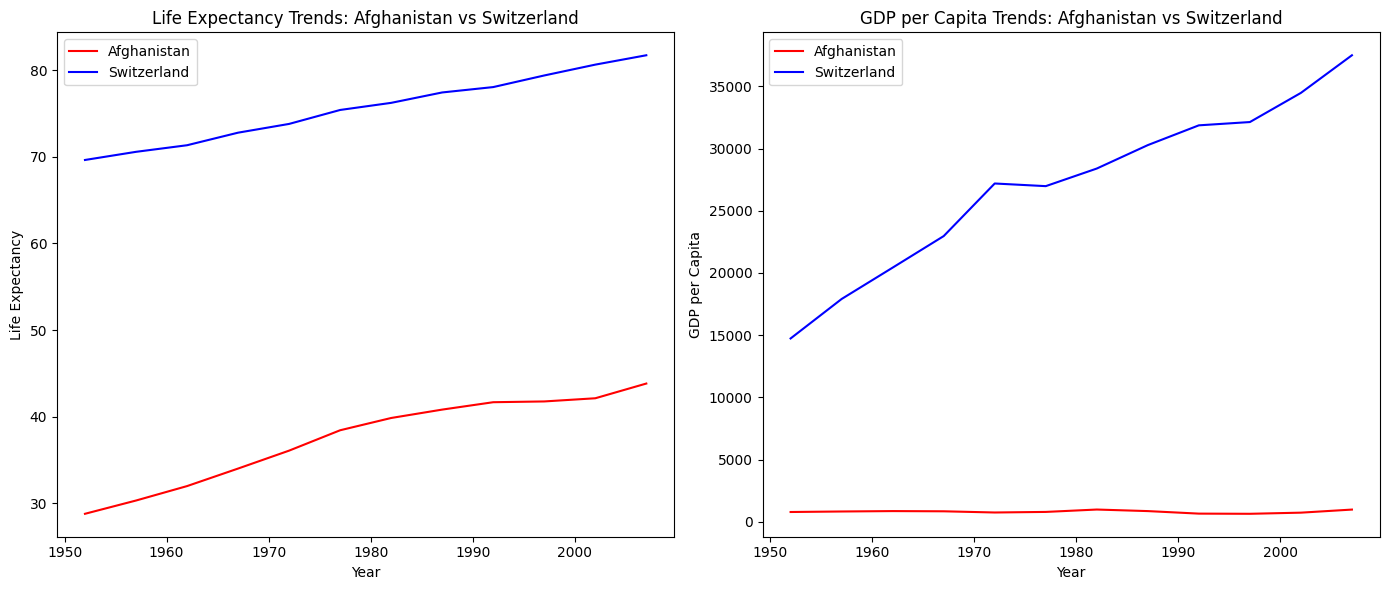

In [40]:
# Trend ns_utsav for Afghanistan and Switzerland over time
afghanistan_trend = ns_utsav[ns_utsav['country'] == 'Afghanistan']
switzerland_trend = ns_utsav[ns_utsav['country'] == 'Switzerland']

# Line graphs for life expectancy and GDP per capita trends
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(afghanistan_trend['year'], afghanistan_trend['life_exp'], label='Afghanistan', color='red')
plt.plot(switzerland_trend['year'], switzerland_trend['life_exp'], label='Switzerland', color='blue')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trends: Afghanistan vs Switzerland')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(afghanistan_trend['year'], afghanistan_trend['gdp_cap'], label='Afghanistan', color='red')
plt.plot(switzerland_trend['year'], switzerland_trend['gdp_cap'], label='Switzerland', color='blue')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Trends: Afghanistan vs Switzerland')
plt.legend()

plt.tight_layout()
plt.show()


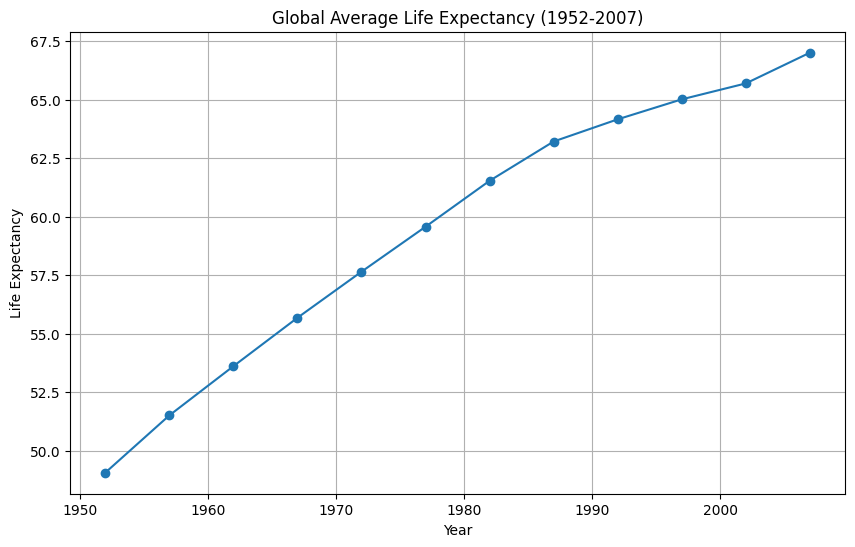

In [41]:
global_avg_life_exp = ns_utsav.groupby('year')['life_exp'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(global_avg_life_exp.index, global_avg_life_exp.values, marker='o')
plt.title('Global Average Life Expectancy (1952-2007)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()